In [1]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Convolution2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Flatten
import cv2
import numpy as np
import glob
import os
from random import shuffle

In [2]:
from tensorflow import keras

In [3]:
import tensorflow as tf
print(tf.test.gpu_device_name())

In [4]:
X_train=[]
X_test=[]
Y_test=[]
Y_train=[]
dataTr=[]
for filename in glob.glob(os.path.join('D:/UMSA/TESIS/Tesis de grado/data/entrenamiento/Melanoma_escalado','*.jpg')):
    dataTr.append([1,cv2.imread(filename)])
for filename in glob.glob(os.path.join('D:/UMSA/TESIS/Tesis de grado/data/entrenamiento/Carcinoma_escalado','*.jpg')):
    dataTr.append([0,cv2.imread(filename)])

In [5]:
dataTe=[]
for filename in glob.glob(os.path.join('D:/UMSA/TESIS/Tesis de grado/data/prueba/melanoma_escalado','*.jpg')):
    dataTe.append([1,cv2.imread(filename)])
for filename in glob.glob(os.path.join('D:/UMSA/TESIS/Tesis de grado/data/prueba/carcinoma_escalado','*.jpg')):
    dataTe.append([0,cv2.imread(filename)])

In [6]:
def particion(datos):
    imagenes=[]
    etiquetas=[]
    for i,j in datos:
        imagenes.append(j)
        etiquetas.append(i)
    imagenes=np.array(imagenes)
    etiquetas=np.array(etiquetas)
    return (imagenes,etiquetas)

In [7]:
shuffle(dataTr)
print("en total tenemos: "+str(len(dataTr))+ " imagenes dentro de la carpeta train")
shuffle(dataTe)
print("en total tenemos: "+str(len(dataTe))+ " imagenes dentro de la carpeta test")

en total tenemos: 12279 imagenes dentro de la carpeta train
en total tenemos: 5261 imagenes dentro de la carpeta test


In [8]:
porcion1=dataTr[0:12000]
porcion2=dataTe[0:5000]
print("para entrenamiento tendremos: "+str(len(porcion1))+ " imagenes de la carpeta de train")
print("para prueba tendremos: "+str(len(porcion2))+ " imagenes de la carpeta de test")

para entrenamiento tendremos: 12000 imagenes de la carpeta de train
para prueba tendremos: 5000 imagenes de la carpeta de test


In [9]:
x_e,y_e=particion(porcion1)
x_p,y_p=particion(porcion2)

In [10]:
def validacion(x_e,y_e,x_p,y_p,modelo1,epocas):
    entre=modelo1.fit(x_e,y_e,batch_size=32,epochs=epocas,validation_data=(x_p,y_p))
    a=modelo1.evaluate(x_p,y_p)
    return a[1]

In [11]:
def evaluacion(modelo1,porcentaje,nombre,v1,v2):
    prediccion=0
    epocas=1
    while(True):
        if prediccion < porcentaje:
            prediccion=(validacion(x_e,y_e,x_p,y_p,modelo1,1))*100
            epocas +=1
            v1.append(epocas-1)
            v2.append(prediccion)
        else:
            print("==> Para el metodo "+nombre+" se utilizo: "+str(epocas-1)+" epocas para llegar a mas del "+str(porcentaje)+"% de acertividad")
            break 

In [14]:
modelo=Sequential()
modelo.add(Convolution2D(4,(3,3),input_shape=(224,224,3),activation='relu'))
modelo.add(Convolution2D(8,(3,3),activation='relu'))
modelo.add(MaxPooling2D(pool_size=((2,2))))
modelo.add(Convolution2D(16,(3,3),activation='relu'))
modelo.add(Flatten())
modelo.add(Dense(128,activation='relu'))
modelo.add(Dense(100,activation='relu'))
modelo.add(Dense(100,activation='relu'))
modelo.add(Dense(1,activation='sigmoid'))
modelo.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 222, 222, 4)       112       
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 220, 220, 8)       296       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 110, 110, 8)       0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 108, 108, 16)      1168      
_________________________________________________________________
flatten_2 (Flatten)          (None, 186624)            0         
_________________________________________________________________
dense_8 (Dense)              (None, 128)               23888000  
_________________________________________________________________
dense_9 (Dense)              (None, 100)              

In [34]:
modelo_adam = keras.optimizers.Adam(learning_rate=0.0008)
modelo.compile(optimizer=modelo_adam,loss='binary_crossentropy',metrics=['accuracy'])
v_eA=[]
v_aA=[]
evaluacion(modelo,83,"ADAM",v_eA,v_aA)

ERROR! Session/line number was not unique in database. History logging moved to new session 1120
Train on 12000 samples, validate on 5000 samples
5000/5000 [==============================] - 8s 2ms/sample - loss: 1.6701 - acc: 0.7970
Train on 12000 samples, validate on 5000 samples
5000/5000 [==============================] - 8s 2ms/sample - loss: 1.1149 - acc: 0.8084
Train on 12000 samples, validate on 5000 samples
5000/5000 [==============================] - 8s 2ms/sample - loss: 0.8603 - acc: 0.8044
Train on 12000 samples, validate on 5000 samples
5000/5000 [==============================] - 8s 2ms/sample - loss: 1.2127 - acc: 0.8232
Train on 12000 samples, validate on 5000 samples
5000/5000 [==============================] - 8s 2ms/sample - loss: 1.3508 - acc: 0.8140
Train on 12000 samples, validate on 5000 samples
5000/5000 [==============================] - 8s 2ms/sample - loss: 1.4500 - acc: 0.7892
Train on 12000 samples, validate on 5000 samples
5000/5000 [=====================

In [35]:
modelo.save("D:/UMSA/Documentos/CNN cancer de piel/MODELOS/17000_2_1_2/modelo")

In [36]:
modelo.save_weights("D:/UMSA/Documentos/CNN cancer de piel/PESOS/17000_2_1_2/modelo_pesos")

In [37]:
count=1
print("# de EPOCAS     Valor del Accuracy")
print("----------------------------------")
for i in v_aA:
    print("epoca ",count," => ",i)
    count +=1

# de EPOCAS     Valor del Accuracy
----------------------------------
epoca  1  =>  79.6999990940094
epoca  2  =>  80.83999752998352
epoca  3  =>  80.44000267982483
epoca  4  =>  82.3199987411499
epoca  5  =>  81.40000104904175
epoca  6  =>  78.92000079154968
epoca  7  =>  78.96000146865845
epoca  8  =>  81.63999915122986
epoca  9  =>  80.58000206947327
epoca  10  =>  79.32000160217285
epoca  11  =>  79.83999848365784
epoca  12  =>  82.05999732017517
epoca  13  =>  82.6200008392334
epoca  14  =>  82.27999806404114
epoca  15  =>  83.31999778747559


In [38]:
%matplotlib inline
import matplotlib.pyplot as mp

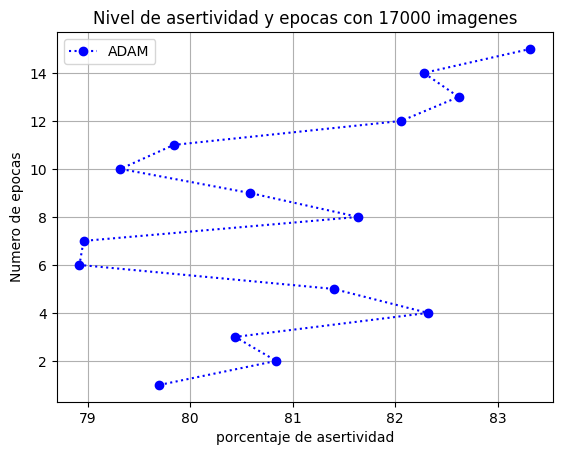

In [39]:
mp.plot(v_aA,v_eA, marker='o', linestyle=':', color='b', label = "ADAM")

#mp.xticks(np.arange(70,100,2))
#mp.yticks(np.arange(0,4,1))
mp.xlabel("porcentaje de asertividad")
mp.ylabel("Numero de epocas")
mp.legend(loc="upper left")
mp.title("Nivel de asertividad y epocas con 17000 imagenes")
mp.grid(True)
mp.show()

In [40]:
lr_probs = modelo.predict_proba(x_p)
lr_probs = lr_probs[:, 0]
ns_probs = [0 for _ in range(len(y_p))]


In [41]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot

In [42]:
# Calculamos el AUC
ns_auc = roc_auc_score(y_p, ns_probs)
lr_auc = roc_auc_score(y_p, lr_probs)
# Imprimimos en pantalla
print('Sin entrenar: ROC AUC=%.3f' % (ns_auc))
print('Red Neuronal: ROC AUC=%.3f' % (lr_auc))

Sin entrenar: ROC AUC=0.500
Red Neuronal: ROC AUC=0.889


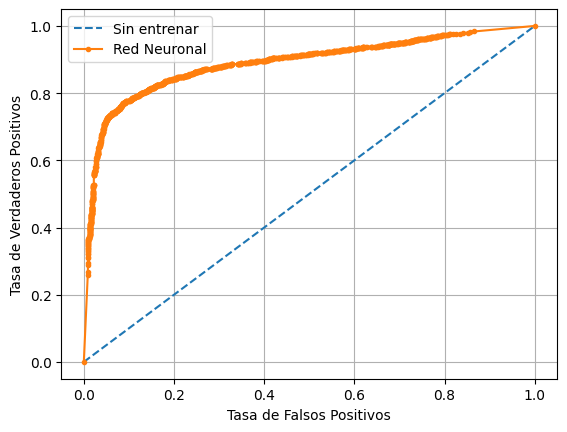

In [43]:
# Calculamos las curvas ROC
ns_fpr, ns_tpr, _ = roc_curve(y_p, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_p, lr_probs)
# Pintamos las curvas ROC
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='Sin entrenar')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='Red Neuronal')
# Etiquetas de los ejes
pyplot.xlabel('Tasa de Falsos Positivos')
pyplot.ylabel('Tasa de Verdaderos Positivos')
pyplot.legend()
mp.grid(True)
pyplot.show()

In [44]:
lr_probs = modelo.predict_proba(x_p)
# Nos quedamos unicamente con las predicciones positicas
lr_probs = lr_probs[:, 0]

In [45]:
yhat = modelo.predict(x_p)

In [46]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score
from sklearn.metrics import auc

In [47]:
lr_precision, lr_recall, _ = precision_recall_curve(y_p, lr_probs)
lr_auc =  auc(lr_recall, lr_precision)
no_skill = len(y_p[y_p==1]) / len(y_p)


Redes neuronales: auc=0.905


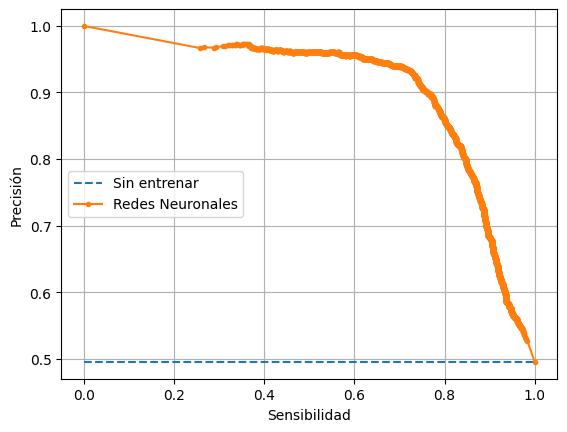

In [48]:
print('Redes neuronales: auc=%.3f' % (lr_auc))
pyplot.plot([0, 1], [no_skill, no_skill], linestyle='--', label='Sin entrenar')
pyplot.plot(lr_recall, lr_precision, marker='.', label='Redes Neuronales')
#Etiquetas de ejes
pyplot.xlabel('Sensibilidad')
pyplot.ylabel('Precisión')
pyplot.legend()
mp.grid(True)
pyplot.show()

In [49]:
modelo.weights

[<tf.Variable 'conv2d_7/kernel:0' shape=(3, 3, 3, 4) dtype=float32>,
 <tf.Variable 'conv2d_7/bias:0' shape=(4,) dtype=float32>,
 <tf.Variable 'conv2d_8/kernel:0' shape=(3, 3, 4, 8) dtype=float32>,
 <tf.Variable 'conv2d_8/bias:0' shape=(8,) dtype=float32>,
 <tf.Variable 'conv2d_9/kernel:0' shape=(3, 3, 8, 16) dtype=float32>,
 <tf.Variable 'conv2d_9/bias:0' shape=(16,) dtype=float32>,
 <tf.Variable 'dense_8/kernel:0' shape=(186624, 128) dtype=float32>,
 <tf.Variable 'dense_8/bias:0' shape=(128,) dtype=float32>,
 <tf.Variable 'dense_9/kernel:0' shape=(128, 100) dtype=float32>,
 <tf.Variable 'dense_9/bias:0' shape=(100,) dtype=float32>,
 <tf.Variable 'dense_10/kernel:0' shape=(100, 100) dtype=float32>,
 <tf.Variable 'dense_10/bias:0' shape=(100,) dtype=float32>,
 <tf.Variable 'dense_11/kernel:0' shape=(100, 1) dtype=float32>,
 <tf.Variable 'dense_11/bias:0' shape=(1,) dtype=float32>]